PONER TITULO DEL PROYECTO, integrantes, y todo eso |

PONER EL CONTEXTO Y LA MOTIVACION 

PONER LAS PREGUNTAS OBJETIVO Y TODO

### DATOS

Los datos a utilizar en este proyecto, son dos datasets de encuentas que se hicieron en dos colegios de Portugal del cual sacamos de la pagina Kaggle. El primer colegio es el Gabriel Pereira localizado en Evora, Portugal y el otro es el Mousinho da Silveira localizado en Portalegre, Portugal.

##### Importando las librerias necesarias para nuestro proyecto

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#esta libreria la usaremos para visualizar la data faltante en los dataframes
import missingno as msgno

import funciones as fn

from IPython.display import display

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn')

### data del colegio Gabriel Pereira

In [2]:
df_gp = pd.read_csv('students_GP.csv', index_col = 0)
df_gp

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,GP,F,"""18""",U,GT3,T,2,3,at_home,other,...,4,3,"""3""",1,2,"""3""",4,11,10,10
345,GP,F,"""18""",U,GT3,T,3,2,other,services,...,5,4,"""3""",2,3,"""1""",7,13,13,14
346,GP,M,"""18""",R,GT3,T,4,3,teacher,services,...,5,3,"""2""",1,2,"""4""",9,16,15,16
347,GP,M,"""18""",U,GT3,T,4,3,teacher,other,...,5,4,"""5""",2,3,"""5""",0,10,10,9


#### -Existen 349 registros (filas) y 33 columnas (variables). En general es una base de datos pequeña.
#### -Se observa al visualizar el df, que existen datos perdidos como: nulidade, sem validade y zero. Se les asignará NaN para dimensionar volumen de datos perdidos.
#### -También, se observa que hay columnas numéricas con doble commilla: age, goout y health. Se eliminarán las comillas y se convertirán a int.
#### -Hay variables categóricas que pueden ser recodificadas a binarias y otras que presentan más de 2 categorías y se convertirán a binarias con getdummies.

In [3]:
df_gp = df_gp.replace(['nulidade', 'sem validade', 'zero'], np.nan)
df_gp = df_gp.replace('\"', '', regex = True)

### data del colegio Mousinho da Silveira

In [4]:
df_ms = pd.read_csv('students_MS.csv', delimiter = ';')
df_ms

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,MS,F,16,U,GT3,T,1,3,at_home,other,...,4,3,3,1,3,5,11,10,11,11
1,MS,F,16,R,GT3,T,2,2,other,other,...,4,4,4,1,1,5,0,12,12,12
2,MS,F,15,R,GT3,T,1,1,at_home,services,...,4,1,3,1,1,2,6,10,10,10
3,MS,F,15,R,GT3,T,3,3,at_home,other,...,5,4,4,2,3,5,4,10,10,11
4,MS,F,16,R,GT3,T,2,3,at_home,services,...,4,5,2,1,2,5,0,16,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
222,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
223,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
224,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#### -Se observa que este dataframe ya se encuentra en buen estado
#### -al igual que el otro, hay variables categóricas que pueden ser recodificadas a binarias y otras que presentan más de 2 categorías y se convertirán a binarias con getdummies.

### Ahora analicemos los tipos de variables antes de hacer nuevos ajustes a los datos.

In [5]:
df_gp.dtypes  #ambos dataframe tienen el mismo asi que tomaremos cualquiera

school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2             int64
G3            object
dtype: object

#### Se observa que la variable objetivo G3 es del tipo object, al igual que la otra variable objetivo secundaria G1. Luego se transformarán a números int para analizar mejor con describe(). También, otras variables son numéricas que aparecen como object que se transformarán a número int o binarias, según correponda.

#### VARIABLES INDEPENDIENTES (Xi):

            ● school: Escuela del estudiante. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● sex: Sexo del estudiante. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● age: Edad del estudiante. Es variable numérica, discreta. Se recodificará a int.
            ● address: Ubicación de la casa del estudiante (Rural o Urbano). Es variable categórica, binaria (2 valores string). 
            Se recodificará con 0 y 1.
            ● famsize: Tamaño de la familia. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● Pstatus: Estado cohabitacional de los padres. Es variable categórica, binaria (2 valores string). Se recodificará
              con 0 y 1.
            ● Medu: Nivel educacional de la madre. Es variable numérica, categórica (4 categorías). Se recodificará con getdummies.
            ● Fedu: Nivel educacional del padre. Es variable numérica, categórica (4 categorías). Se recodificará con getdummies.
            ● Mjob: Ocupación de la madre. Es variable categórica, nominal (5 categorías string). Se recodificará con getdummies.
            ● Fjob: Ocupación del padre. Es variable categórica, nominal (5 categorías string). Se recodificará con getdummies.
            ● reason: Razón para escoger la escuela.  Es variable categórica, nominal (4 categorías string). Se recodificará con getdummies.
            ● guardian: Apoderado del estudiante. Es variable categórica, nominal (3 categorías string). Se recodificará con getdummies.
            ● traveltime: Tiempo de viaje entre hogar y colegio. Es variable numérica, categórica (4 categorías). Se recodificará con getdummies.
            ● studytime: Horas semanales dedicadas al estudio. Es variable numérica, categórica (4 categorías). Se recodificará con getdummies.
            ● failures: Número de clases reprobadas. Es variable numérica, categórica (4 categorías). Se recodificará con getdummies.
            ● schoolsup: Apoyo educacional del colegio. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● famsup: Apoyo educacional familiar. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● paid: Clases particulares pagadas. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● activities: Actividades extracurriculares. Es variable categórica, binaria (2 valores string). Se recodificará
              con 0 y 1.
            ● nursery: Asistió a guardería infantil. Es variable categórica, binaria (2 valores string). Se recodificará 
              con 0 y 1.
            ● higher: Desea proseguir estudios superiores. Es variable categórica, binaria (2 valores string). Se recodificará
              con 0 y 1.
            ● internet: Acceso a internet desde el hogar. Es variable categórica, binaria (2 valores string). Se recodificará 
              con 0 y 1.
            ● romantic: Relación romántica. Es variable categórica, binaria (2 valores string). Se recodificará con 0 y 1.
            ● famrel: Calidad de las relaciones familiares. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies.
            ● freetime: Tiempo libre fuera del colegio. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies. 
            ● goout: Salidas con amigos. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies.
            ● Dalc: Consumo de alcohol en día de semana. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies.
            ● Walc: Consumo de alcohol en fines de semana. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies.
            ● health: Estado de salud actual. Es variable numérica, categórica (5 categorías). Se recodificará con getdummies.
            ● absences: Cantidad de ausencias escolares. Es variable numérica, discreta. Se recodificará a int.

#### VARIABLES DEPENDIENTES (Y):

            ● G1: Notas durante el primer semestre. Es variable numérica, discreta. Se recodificará a int. Este es uno de los vectores
                  objetivos para el modelo descriptivo.
            ● G2: Notas durante el segundo semestre. Es variable numérica (int), discreta. Este es uno de los vectores objetivos para
                  el modelo descriptivo.
            ● G3: Promedio final. Es variable numérica, discreta. Se recodificará a int. Este es uno de los vectores objetivos para
                  el modelo descriptivo y el vector a predecir en el modelo predictivo.

concatenando dataframes


In [6]:
df = pd.concat([df_gp, df_ms], axis=0)  #concatenando los dataframes
df = df.reset_index(drop=True)  #reseteando index del dataframe total
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,NaN,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
571,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
572,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
573,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Inspección y Análisis de los Datos Perdidos en las variables

In [7]:
print(df.isnull().sum(), df.isnull().sum().sum())

school        4
sex           3
age           4
address       1
famsize       4
Pstatus       5
Medu          3
Fedu          4
Mjob          5
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      4
schoolsup     7
famsup        3
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      1
famrel        5
freetime      2
goout         5
Dalc          3
Walc          4
health        4
absences      4
G1            4
G2            0
G3            2
dtype: int64 118


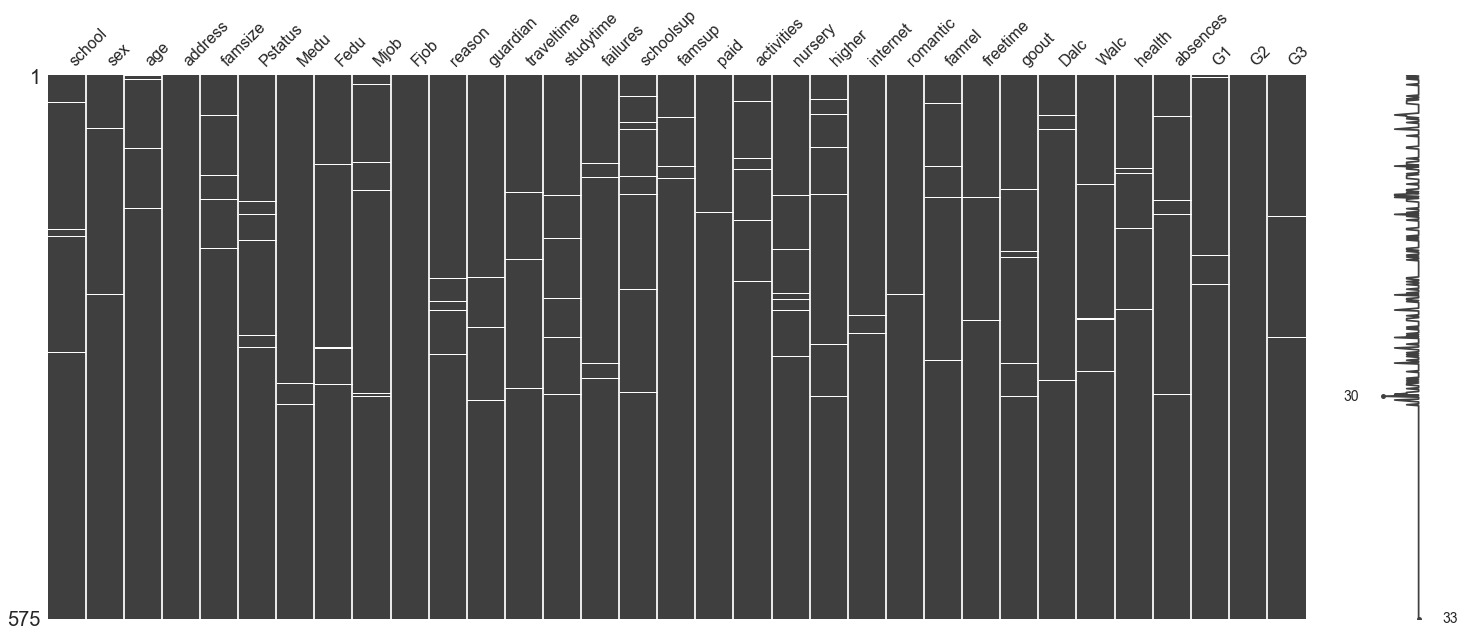

In [8]:
msgno.matrix(df, inline = True)

    •	Se observa que existen 118 datos perdidos en las variables.
    •	Todas las columnas tienen datos perdidos excepto las columnas Fjob y G2, debido a que en las escuelas no tienen buenas
         prácticas sobre cómo ingresar datos.
    •	Analizando los datos perdidos por variable, no es razonable asignar o imputar datos ya sea por la media, frecuencia, u otra
         asignación. Esto debido a que las variables son sensibles a los datos, por ejemplo, la edad, sexo, estado cohabitacional de
         los padres, niveles de educación y ocupaciones de los padres, tiempo de viaje, horas de estudio, clases reprobadas, apoyo
         educacional, clases particulares, si desea proseguir estudios, acceso a internet, relación
         romántica, calidad de las relaciones familiares, consumo de alcohol, ausencias escolares y notas.
    •	Además de considerar que la base total de datos no es grande, estaríamos sesgando los potenciales resultados.
    •	Se toma la decisión de eliminar los registros (filas) con datos perdidos para seguir con una evaluación más adecuada.

In [9]:
df = df.dropna()
df.shape

(473, 33)

#### Se aprecia que disminuyó el número de registros de 574 filas a 473 filas, eliminando 101 registros.

# Analisis exploratorio de datos

#### conversion de variables


### a)	Variables numéricas discretas:

    •	En esta clasificación se incluye a las variables: age, absences, G1, G2 y G3.
    •	Para estos casos, que aparecen en la base como tipo object, serán cambiados a tipo int. Sólo la variable G2
         ya está como int.

In [10]:
df[['age', 'absences', 'G1', 'G3']] = df[['age', 'absences', 'G1', 'G3']].astype('int64')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
571,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
572,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
573,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [11]:
df.describe()

,age,absences,G1,G2,G3
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,16.689218,4.291755,10.634249,10.583510,10.509514
std,1.199678,6.753803,3.183553,3.651953,4.322342
min,15.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,10.000000,10.000000,11.000000
75%,18.000000,6.000000,13.000000,13.000000,13.000000
max,20.000000,75.000000,19.000000,19.000000,20.000000


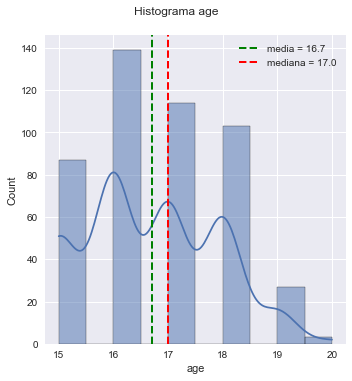

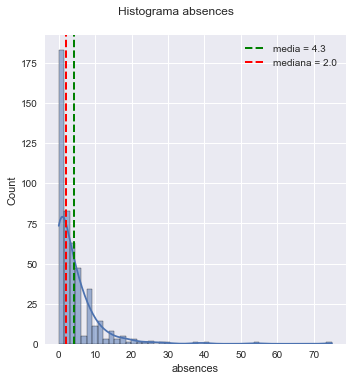

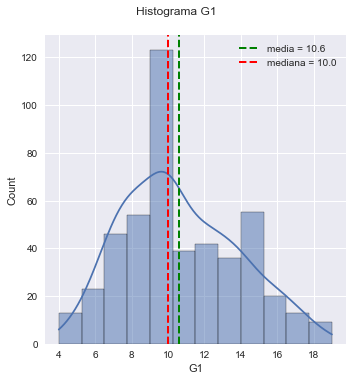

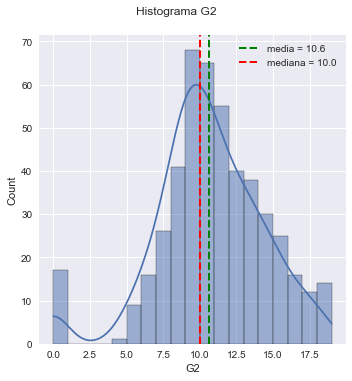

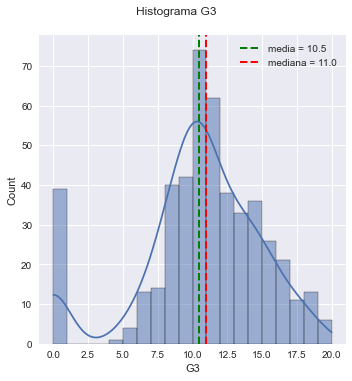

In [12]:
var_num_disc = ['age', 'absences', 'G1', 'G2', 'G3']

for i in var_num_disc:
    fn.plot_hist(df, i)

#### Analizando la tabla describe() y los histogramas para estas variables numéricas discretas, se tiene:

    •	La media y mediana se acercan bastante para cada una de ellas.
    •	Las edades de los alumnos están en su mayoría entre 15 y 18 años (perc 75%). Su desviación estándar es baja.
    •	En relación a las notas, se parecen bastante sus valores medios y medianas, con una dispersión relativamente
         parecidas. Se observa, que las notas G1, G2 y G3 tienden a tener una distribución normal, que es habitual para
         este tipo de variables. Es extraño que exista para G2 y G3 notas mínimas de 0, salvo que se trate de alumnos 
         que desertaron de estudiar y los mantuvieron en las listas.

### Variables categóricas:
        • En esta clasificación se incluye todo el resto de las variables, ya sean binarias o numéricas categóricas. 
        • Para estos casos, que aparecen en la base como tipo object, después serán convertidas a binarias.

In [13]:
df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout' ,'Dalc' ,'Walc', 'health']] = df[['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout' ,'Dalc' ,'Walc', 'health']].astype('int64')

la funcion frecuencia lo que hace es retornar el porcentje en el que se encuentran las variables.

In [14]:
fn.frecuencia(df,'school')

GP    52.22
MS    47.78
Name: school, dtype: float64


estan casi 50/50 en el colegio que se encuentran los alumnos, Se binarizará la variable asignando 1 a la de menor frecuencia, que es la escuela Mousinho da Silveira MS. MS=1 y GP=0.

In [15]:
fn.frecuencia(df,'sex')

F    57.93
M    42.07
Name: sex, dtype: float64


Son similares las categorías. Para binarizar la variable se asignará 1 a hombre M (minoritaria). M=1 y F=0.

In [16]:
fn.frecuencia(df,'address')

U    64.27
R    35.73
Name: address, dtype: float64


un 65% se encuentra en zona urbana, y un 35% en zona rural. Se binarizará minoritaria con 1. R= 1 y U=0

In [17]:
fn.frecuencia(df,'famsize')

GT3    72.3
LE3    27.7
Name: famsize, dtype: float64


La mayoría de los alumnos posee familias de más de 3 integrantes (72%) y de menos de 3 integrantes el 23% (minoritaria). Se binariza LE3=1 y GT3=0

In [18]:
fn.frecuencia(df,'Pstatus')

T    89.64
A    10.36
Name: Pstatus, dtype: float64


La gran mayoría de los padres de los alumnos cohabitan juntos (90%) y un 10% viven separados (minoritaria). Se binariza A=1 y T=0

In [19]:
fn.frecuencia(df,'Medu')

4    27.06
2    26.85
1    24.52
3    20.72
0     0.85
Name: Medu, dtype: float64


In [20]:
fn.frecuencia(df,'Fedu')

2    30.87
1    28.33
3    21.14
4    18.60
0     1.06
Name: Fedu, dtype: float64


In [21]:
fn.frecuencia(df,'Mjob')

other       38.90
at_home     22.62
services    19.45
teacher     11.42
health       7.61
Name: Mjob, dtype: float64


In [22]:
fn.frecuencia(df,'Fjob')

other       54.76
services    29.18
at_home      6.98
teacher      5.29
health       3.81
Name: Fjob, dtype: float64


La ocupación del padre es mayoritariamente other con un 55%, y la menor es estar o ser dueeños de casa. Los profesores son un 5% que es la mitad de madres profesaoras.

In [23]:
fn.frecuencia(df,'reason')

course        43.34
reputation    21.56
home          21.56
other         13.53
Name: reason, dtype: float64


Las principales razones para escoger la escuela son preferencia de cursos 43%, estar cerca del hogar 21% y reputación de la escuela 21%.

In [24]:
fn.frecuencia(df,'guardian')

mother    69.77
father    23.47
other      6.77
Name: guardian, dtype: float64


Principalmente los apoderados de los alumnos son las madres con un 70% y luego los papás con un 23%.

In [25]:
fn.frecuencia(df,'traveltime')

1    52.85
2    35.52
3     9.73
4     1.90
Name: traveltime, dtype: float64


Se aprecia que los alumnos en un 52% viven cerca de su escuela (a menos de 15 minutos), un 35% viven de 15 a 30 minutos y un 10% está a más de 30 minutos.

In [26]:
fn.frecuencia(df,'studytime')

2    46.51
1    32.77
3    15.01
4     5.71
Name: studytime, dtype: float64


Un 46% de los alumnos dedican de 2 a 5 horas de estudio semanales, un 32% menos de 2 horas, un 15% de 5 a 10 horas y sólo un 5% a estudiar más de 10 horas semanales.

In [27]:
fn.frecuencia(df,'failures')

0    78.01
1    15.22
2     3.59
3     3.17
Name: failures, dtype: float64


Hay un 78% de los alumnos que no presentan clases reprobadas, un 15% que han reprobado 1 clase, y un 7% que han reprodao entre 2 y 3 clases.

In [28]:
fn.frecuencia(df,'schoolsup')

no     89.43
yes    10.57
Name: schoolsup, dtype: float64


La mayoría de los alumnos (89%) no han recibido apoyo de la escuela y un 11% si (minoritaria). Se binarizará la variable con yes=1 y no=0

In [29]:
fn.frecuencia(df,'famsup')

yes    61.1
no     38.9
Name: famsup, dtype: float64


In [30]:
fn.frecuencia(df,'paid')

no     74.0
yes    26.0
Name: paid, dtype: float64


In [31]:
fn.frecuencia(df,'activities')

no     51.16
yes    48.84
Name: activities, dtype: float64


In [32]:
fn.frecuencia(df,'nursery')

yes    80.55
no     19.45
Name: nursery, dtype: float64


In [33]:
fn.frecuencia(df,'higher')

yes    89.64
no     10.36
Name: higher, dtype: float64


In [34]:
fn.frecuencia(df,'internet')

yes    73.78
no     26.22
Name: internet, dtype: float64


In [35]:
fn.frecuencia(df,'romantic')

no     63.64
yes    36.36
Name: romantic, dtype: float64


In [36]:
fn.frecuencia(df,'famrel')

4    49.89
5    27.48
3    14.16
2     5.07
1     3.38
Name: famrel, dtype: float64


In [37]:
fn.frecuencia(df,'freetime')

3    37.21
4    27.48
2    15.86
5    11.84
1     7.61
Name: freetime, dtype: float64


In [38]:
fn.frecuencia(df,'goout')

3    33.83
2    22.83
4    20.08
5    16.49
1     6.77
Name: goout, dtype: float64


In [39]:
fn.frecuencia(df,'Dalc')

1    69.56
2    18.60
3     7.40
5     2.33
4     2.11
Name: Dalc, dtype: float64


In [40]:
fn.frecuencia(df,'Walc')

1    39.75
2    22.62
3    17.97
4    13.11
5     6.55
Name: Walc, dtype: float64


In [41]:
fn.frecuencia(df,'health')

5    36.36
3    21.56
4    17.55
1    12.68
2    11.84
Name: health, dtype: float64


Un 76% de los alumnos dicen tener un normal, buen o muy buen estado de salud (categorías 3,4 y 5). Un 24% posee un mal estado de salud (categorías 1y 2).

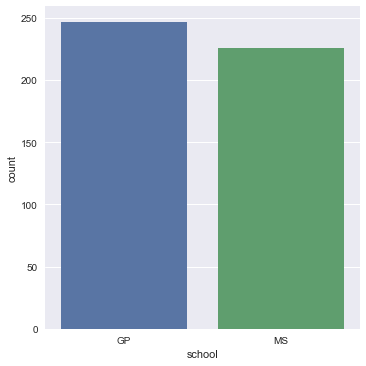

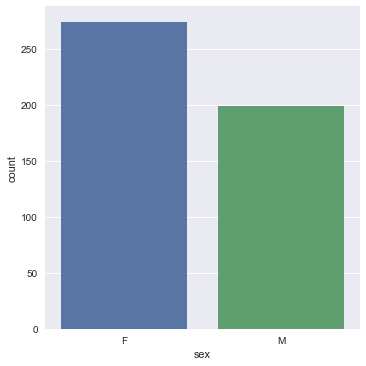

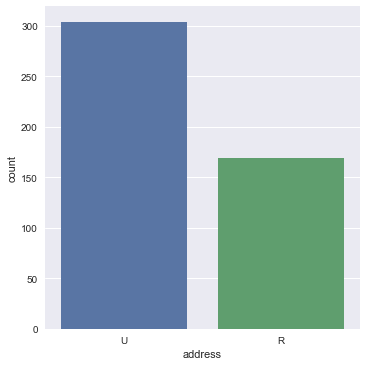

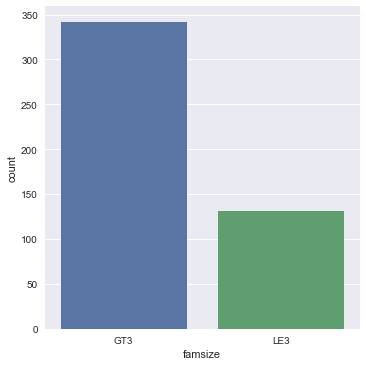

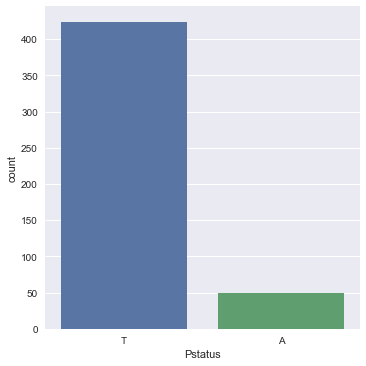

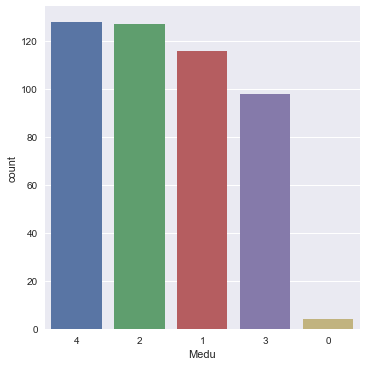

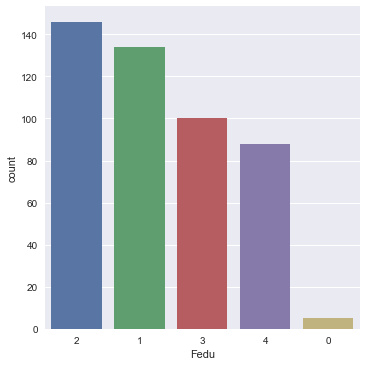

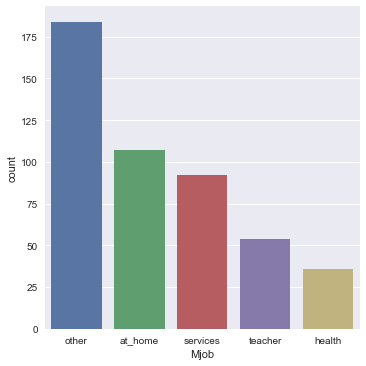

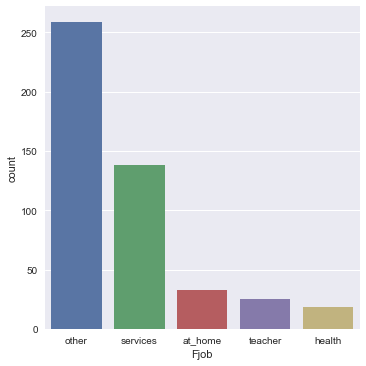

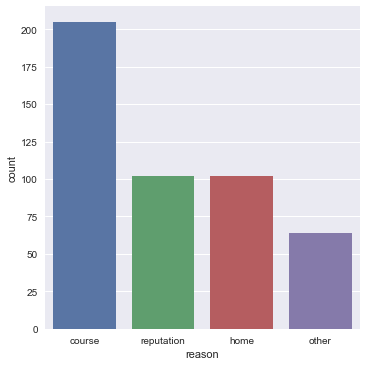

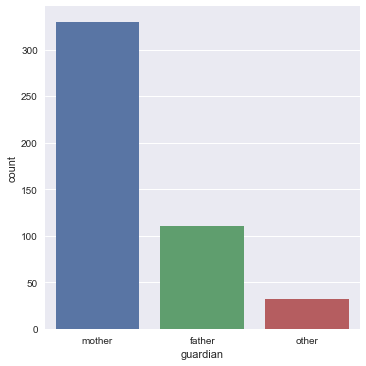

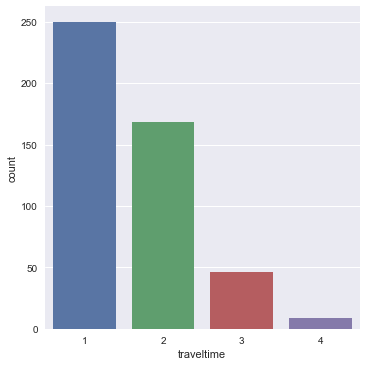

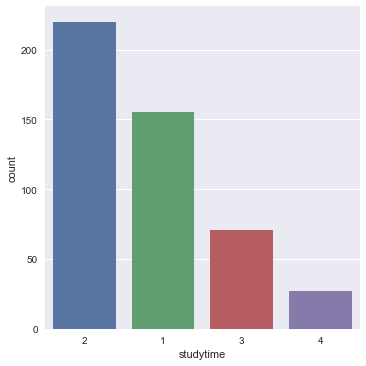

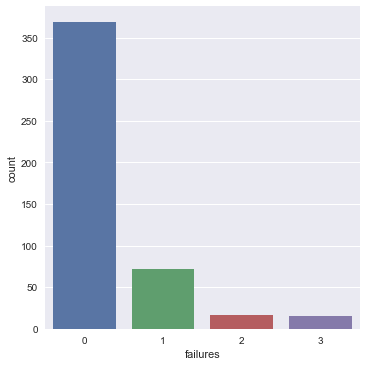

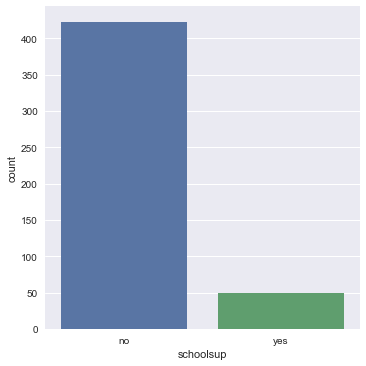

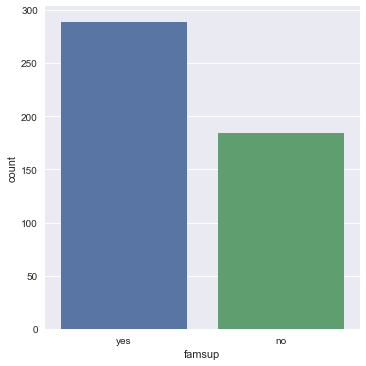

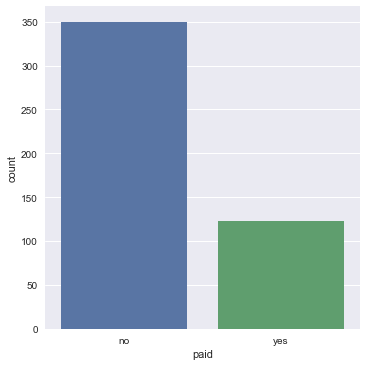

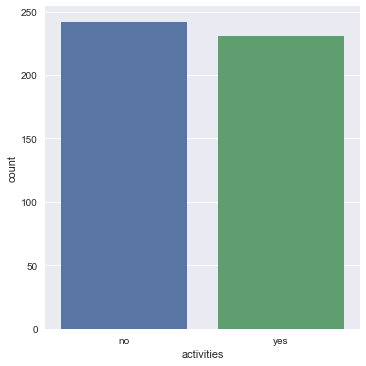

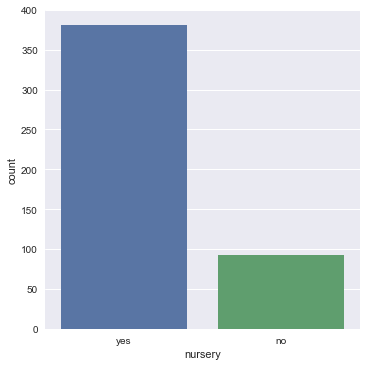

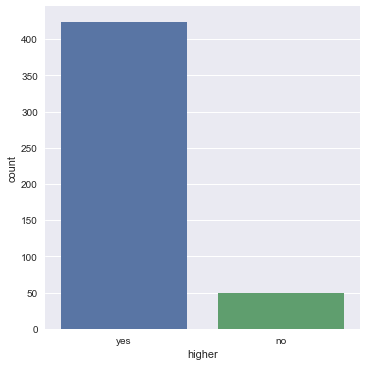

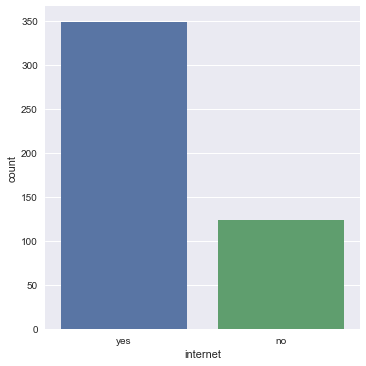

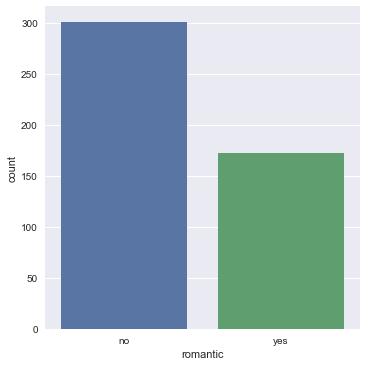

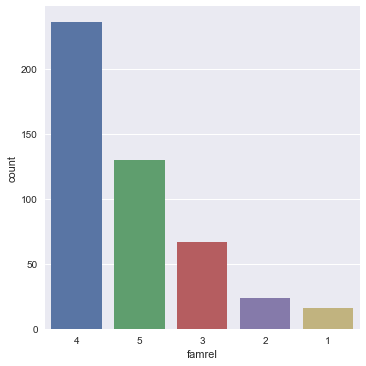

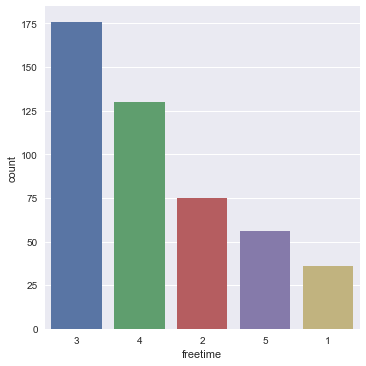

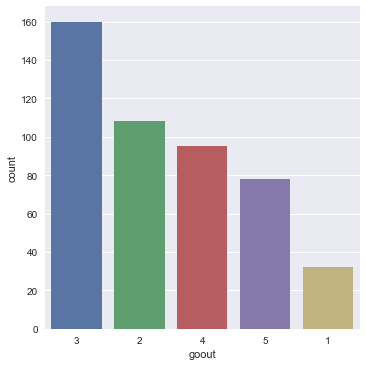

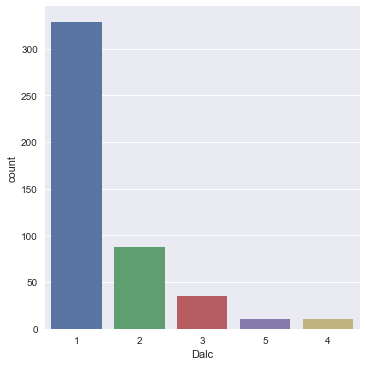

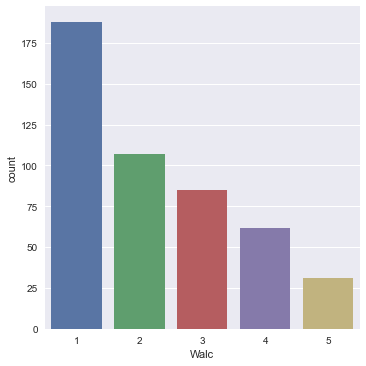

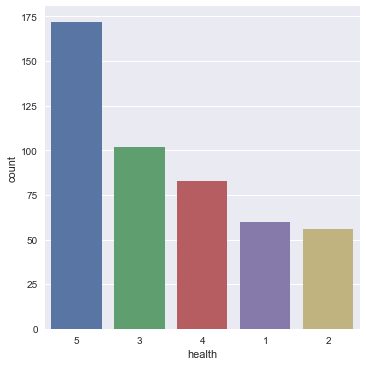

In [42]:
lista_categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']

for i in lista_categorical:
    fn.graf_barra(df, i)

### Recodificación a variables binarias (0 y 1):
    -Previo a la modelación, se binarizarán las variables para poder utilizarlas en los modelos.
    -Variables binarias (2 categorías), asignando 1 a la categoría minoritaria y 0 a la mayoritaria.
    -Variables categóricas (con más de 2 categorías): se aplicará getdummies

#### i) Variables binarias a 0 y 1:

         ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
         'nursery', 'higher', 'internet', 'romantic']

In [43]:
lista_binarias_sin_num =['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
         'nursery', 'higher', 'internet', 'romantic']

for i in lista_binarias_sin_num:
    df[i] = np.where(df[i] == df[i].value_counts().index[1], 1, 0) # compara cada dato con categoría minoritaria y le asigna 1.

In [44]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,0,0,17,0,0,0,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,0,0,15,0,0,0,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,0,1,16,0,1,0,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,1,0,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,0,1,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1,0,19,1,0,0,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
571,1,0,18,0,1,0,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
572,1,0,18,0,0,0,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
573,1,1,17,0,1,0,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#### ii) Variables categíricas (más de 2 categorías) a 0 y 1 con getdummies:

In [45]:
lista_categorical = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

df_bin = pd.get_dummies(df, columns = lista_categorical) # Agrega las dummies de inmediato y a todo el dataframe

In [46]:
df_bin

,school,sex,age,address,famsize,Pstatus,schoolsup,famsup,paid,activities,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
1,0,0,17,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,15,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
5,0,1,16,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
6,0,1,16,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
7,0,0,17,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1,0,19,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
571,1,0,18,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
572,1,0,18,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
573,1,1,17,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


## Análisis de datos

-Para la Modelación Predictiva de G3 aplicaremos el Modelo de Regresión Lineal utilizando la librería ScikitLearn.

-analizaremos las variables que tienen mas y menos peso dentro del modelo 

-Se realizarán 3 modelos para la variable dependiente G3: uno con todos las variables, otro con las variables depuradas en la modelación descriptiva y un tercero con variables depuradas con cambio de hiperparámetros (sin interceto y sin normalización).

In [47]:
df_bin_g3 = df_bin.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'absences', 'G3', 'Medu_0', 'Medu_1', 'Medu_2',
       'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_1', 'Walc_2',
       'Walc_3', 'Walc_4', 'Walc_5', 'health_1', 'health_2', 'health_3',
       'health_4', 'health_5']]

In [48]:
X_total = df_bin_g3.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'absences', 'Medu_0', 'Medu_1', 'Medu_2',
       'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2',
       'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2',
       'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2',
       'failures_3', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4',
       'famrel_5', 'freetime_1', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5',
       'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_1', 'Walc_2',
       'Walc_3', 'Walc_4', 'Walc_5', 'health_1', 'health_2', 'health_3',
       'health_4', 'health_5']]

y = df_bin_g3['G3']

En X total eliminamos el promedio G1, G2 Y G3 para que estos no afecten en el modelo y la variable dependiende sera el G3

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y, test_size = 0.30, random_state = 123)

### a) modelo con intercepto y normalizacion (calcular beta=0 y normalizar todos los X_train)

In [50]:
model_1 = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
model_1_yhat = model_1.predict(X_test)

In [51]:
y_predict_test = model_1.predict(X_test)

fn.report_scores(y_test, y_predict_test)

Error Cuadrático Promedio (MSE): 18.1
R2: -0.03


### b) modelo sin intercepto y sin normalizacion

In [52]:
model_2 = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
model_2_yhat = model_2.predict(X_test)

In [53]:
y_predict_test2 = model_2.predict(X_test)

fn.report_scores(y_test, y_predict_test2)

Error Cuadrático Promedio (MSE): 18.2
R2: -0.03


### c) refactorizacion de variables. Modelo reducido 

In [69]:
from IPython.display import display

x = fn.fetch_features(df_bin_g3, 'G3')
pd.options.display.max_rows = None
display(x)

,correlaciones,abs_corr
variables,,
failures_0,0.340476,0.340476
failures_3,-0.208569,0.208569
higher,-0.195974,0.195974
failures_1,-0.191756,0.191756
failures_2,-0.191135,0.191135
Medu_4,0.162873,0.162873
age,-0.153258,0.153258
goout_5,-0.134244,0.134244
Fedu_1,-0.132869,0.132869


Vamos a contruir otro modelo considerando solo las variables con coeficiente de pearson >= 0.1
Por lo tanto las variables son failures_0, failures_3, higher, failures_1, failures_2, Medu_4, age, goout_5, Fedu_1, goout_2, Dalc_1, Dalc_2, romantic, health_1, freetime_2, guardian_other , Mjob_at_home .		 

In [75]:
pd.options.display.max_rows = False
x_reducido = df_bin_g3[['failures_0', 'failures_3', 'higher', 'failures_1', 'failures_2', 'Medu_4', 'age', 'goout_5', 'Fedu_1', 'goout_2', 'Dalc_1', 'Dalc_2', 'romantic', 'health_1', 'freetime_2', 'guardian_other' , 'Mjob_at_home']]
x_reducido

,failures_0,failures_3,higher,failures_1,failures_2,Medu_4,age,goout_5,Fedu_1,goout_2,Dalc_1,Dalc_2,romantic,health_1,freetime_2,guardian_other,Mjob_at_home
1,1,0,0,0,0,0,17,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,15,0,0,1,1,0,1,0,1,0,0
5,1,0,0,0,0,1,16,0,0,1,1,0,0,0,0,0,0
6,1,0,0,0,0,0,16,0,0,0,1,0,0,0,0,0,0
7,1,0,0,0,0,1,17,0,0,0,1,0,0,1,0,0,0
8,1,0,0,0,0,0,15,0,0,1,1,0,0,1,1,0,0
9,1,0,0,0,0,0,15,0,0,0,1,0,0,0,0,0,0
11,1,0,0,0,0,0,15,0,1,1,1,0,0,0,1,0,0
12,1,0,0,0,0,1,15,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [61]:
model_1.coef_

array([ 1.58256368e+00, -4.01136808e-02, -9.41279577e-02, -1.27049028e+00,
        4.79158736e-01, -8.79515859e-01, -1.60718551e-01,  5.87211766e-01,
        2.23275838e-02, -6.52380345e-01, -2.88850198e-01, -9.20490546e-01,
       -4.87182971e-01, -4.43007536e-01,  1.00627928e-01, -1.72890938e+13,
       -1.72890938e+13, -1.72890938e+13, -1.72890938e+13, -1.72890938e+13,
       -2.66454533e+14, -2.66454533e+14, -2.66454533e+14, -2.66454533e+14,
       -2.66454533e+14, -3.80173289e+13, -3.80173289e+13, -3.80173289e+13,
       -3.80173289e+13, -3.80173289e+13, -5.70948385e+13, -5.70948385e+13,
       -5.70948385e+13, -5.70948385e+13, -5.70948385e+13,  2.43151833e+13,
        2.43151833e+13,  2.43151833e+13,  2.43151833e+13,  3.95636451e+14,
        3.95636451e+14,  3.95636451e+14, -1.01780738e+14, -1.01780738e+14,
       -1.01780738e+14, -1.01780738e+14, -5.30491429e+13, -5.30491429e+13,
       -5.30491429e+13, -5.30491429e+13,  2.53064808e+14,  2.53064808e+14,
        2.53064808e+14,  